# Valorant Project: Correlation of Features and Target Label

<hr>  
  
##### Prereq Code for Collecting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl



runs = []
with open("C:\\Users\\Binaryxx Sune\\Documents\\Programming\\personal_projects\\data\\competitive_data.pkl", "rb") as comp_data_file:
    try:
        while True:
                runs.append(pkl.load(comp_data_file))
    except:
        pass
matches = sum(runs, [])

agent = []
val_map = []
rank = []
outcome = []



for match in matches:
        # get map played by each player
        for i in range(10):
            val_map.append(match["metadata"]["map"])

        # get agent selected by each player and their rank
        for player in match["players"]["all_players"]:
            agent.append(player["character"])
            rank.append(player["currenttier"])

        # get match outcome of each player
        for player in match["players"]["all_players"]:
            player_team = player["team"].lower()
            outcome.append(match["teams"][player_team]["has_won"])



data_dict = {"agent": agent, "val_map" : val_map, "rank": rank, "win": outcome}

val_data = pd.DataFrame(data_dict)
val_data = val_data[~val_data["val_map"].isin(["Breeze", "Bind"])] # filter out of cycle maps
val_data = val_data[val_data["rank"] != 0] # filter out non calibrated records



val_data

,agent,val_map,rank,win
0,Reyna,Haven,14,True
1,Phoenix,Haven,14,True
2,Fade,Haven,13,True
3,Killjoy,Haven,12,False
4,Jett,Haven,15,False
...,...,...,...,...
1375,Harbor,Ascent,11,True
1376,Sova,Ascent,11,True
1377,Jett,Ascent,14,False
1378,Reyna,Ascent,14,True


<hr>

## Visualizing Correlation

<hr>  

### Agent Performance Based on Maps  


##### Prereq Code to Calculate Win Rate

In [2]:
agent_data = val_data.groupby(["agent", "val_map"], as_index = False)["win"].sum()
win_count = agent_data["win"].to_numpy()
match_count = val_data.groupby(["agent", "val_map"], as_index = False)["win"].count()["win"].to_numpy()
agent_data["match_count"] = match_count
agent_data["win_rate"] = np.around((win_count / match_count) * 100, decimals = 2)

agent_data

,agent,val_map,win,match_count,win_rate
0,Astra,Ascent,2,2,100.00
1,Astra,Fracture,2,3,66.67
2,Astra,Haven,3,3,100.00
3,Astra,Icebox,2,2,100.00
4,Astra,Lotus,0,2,0.00
...,...,...,...,...,...
134,Yoru,Haven,2,5,40.00
135,Yoru,Icebox,2,2,100.00
136,Yoru,Lotus,3,4,75.00
137,Yoru,Pearl,2,2,100.00


 
  
#### Agent Performance on All Maps

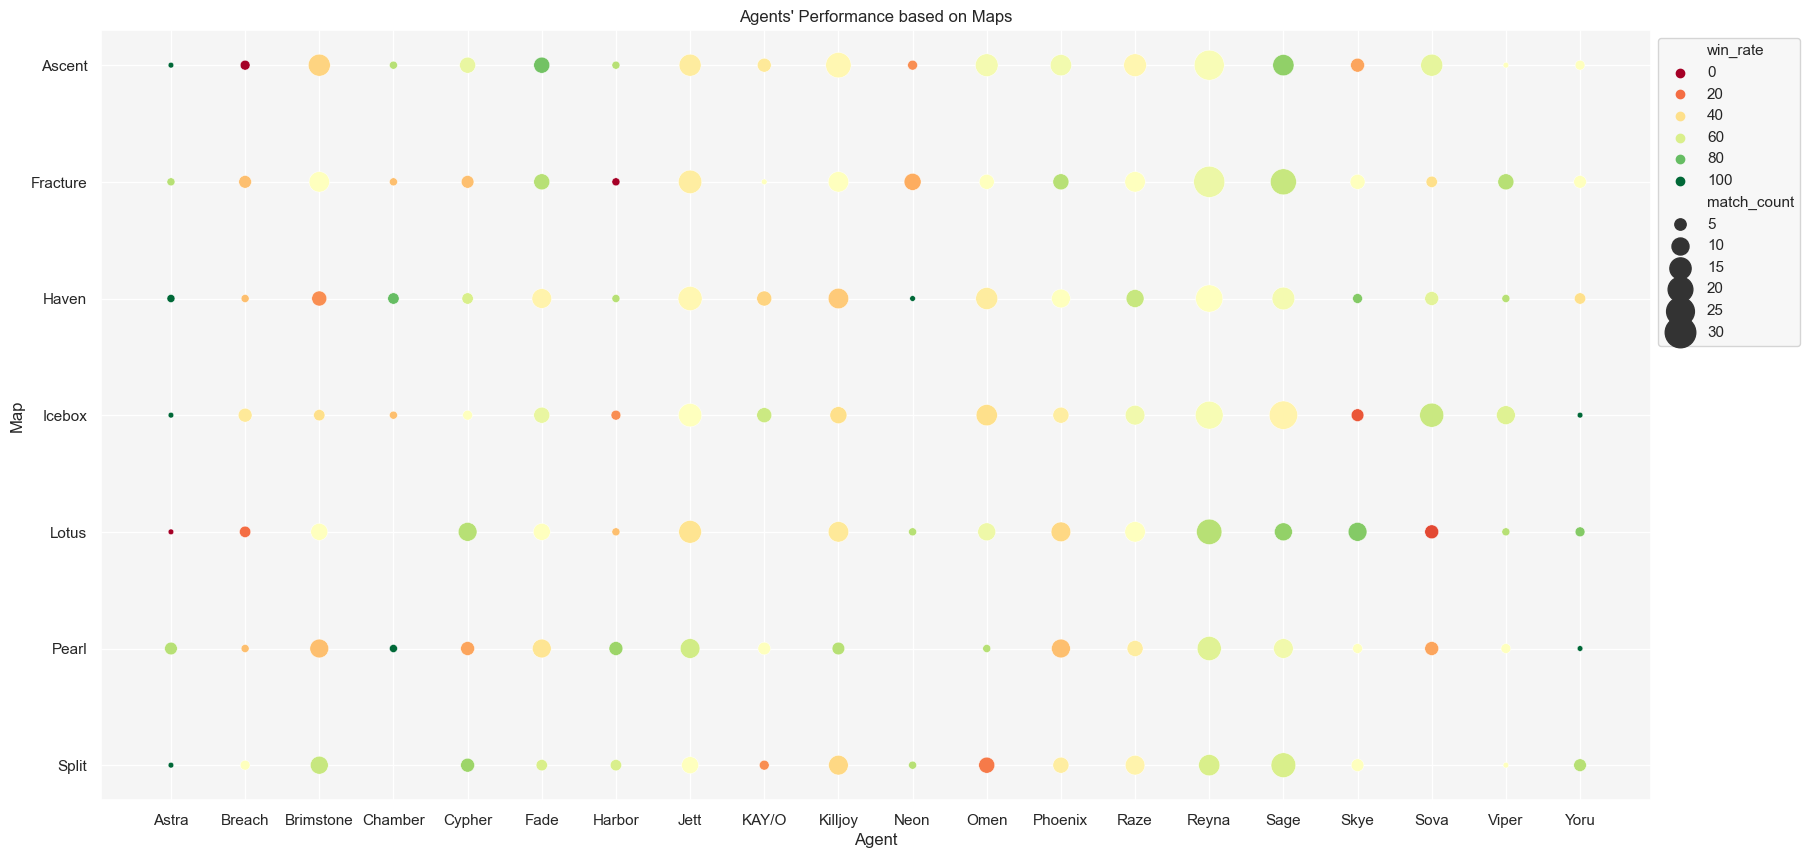

In [3]:
sns.set(rc = {"figure.figsize": (20, 10), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

sns.scatterplot(data = agent_data, x = "agent", y = "val_map", size = "match_count", sizes = (0, 500), hue = "win_rate", palette = "RdYlGn")

plt.xlabel("Agent")
plt.ylabel("Map")
plt.legend(bbox_to_anchor = (1,1))
plt.title("Agents' Performance based on Maps")

plt.show()

# Too much happening

<hr>


#### Agent's Performance on Individual Maps  


##### Prereq Code

In [4]:
def give_agent_map_corr(map):
    """""
    input a map; returns a bar graph which shows the win rate based on color and the height of the bar based on how many matches the agent has been played in that map 
    (doubles as a way to check reliability on win rate for that given agent)
    """
    map_df = agent_data[agent_data["val_map"] == map.capitalize()]
    map_df["win_rate"].round(2)

    sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

    map_viz = sns.barplot(y = "match_count", x = "agent", hue = "win_rate", data = map_df, palette = "RdYlGn", dodge = False)

    plt.xlabel("Agents")
    map_viz.tick_params(labelsize = 10)
    plt.ylabel("Match Count")
    plt.title("Agents' Performance on "+ map.capitalize())

    plt.show()

##### Haven

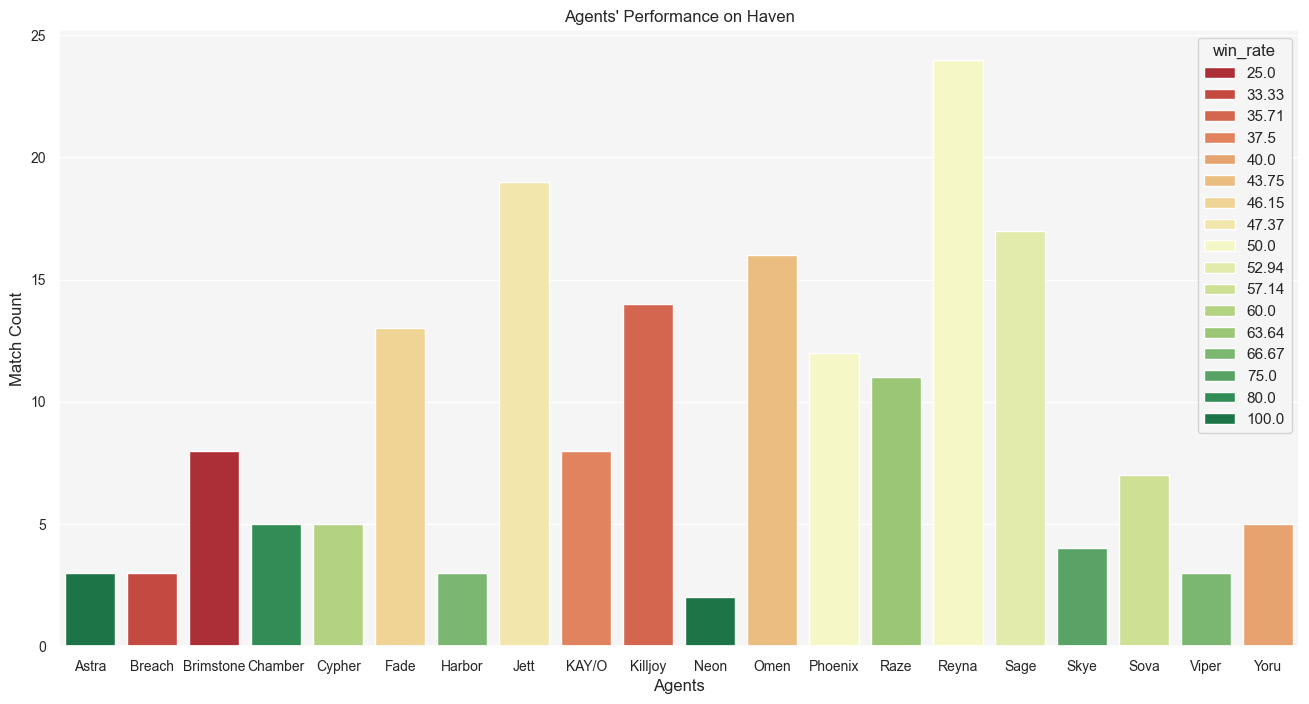

In [5]:
give_agent_map_corr("haven")

##### Icebox

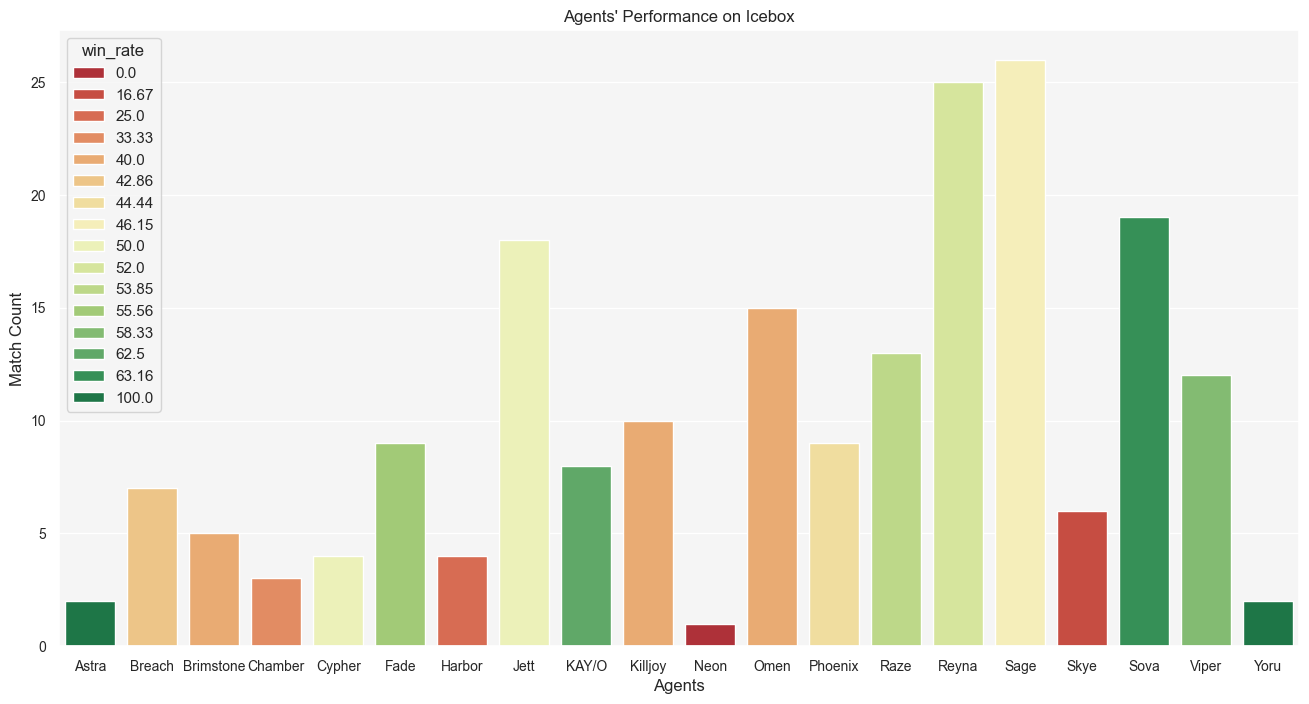

In [6]:
give_agent_map_corr("Icebox")

##### Split

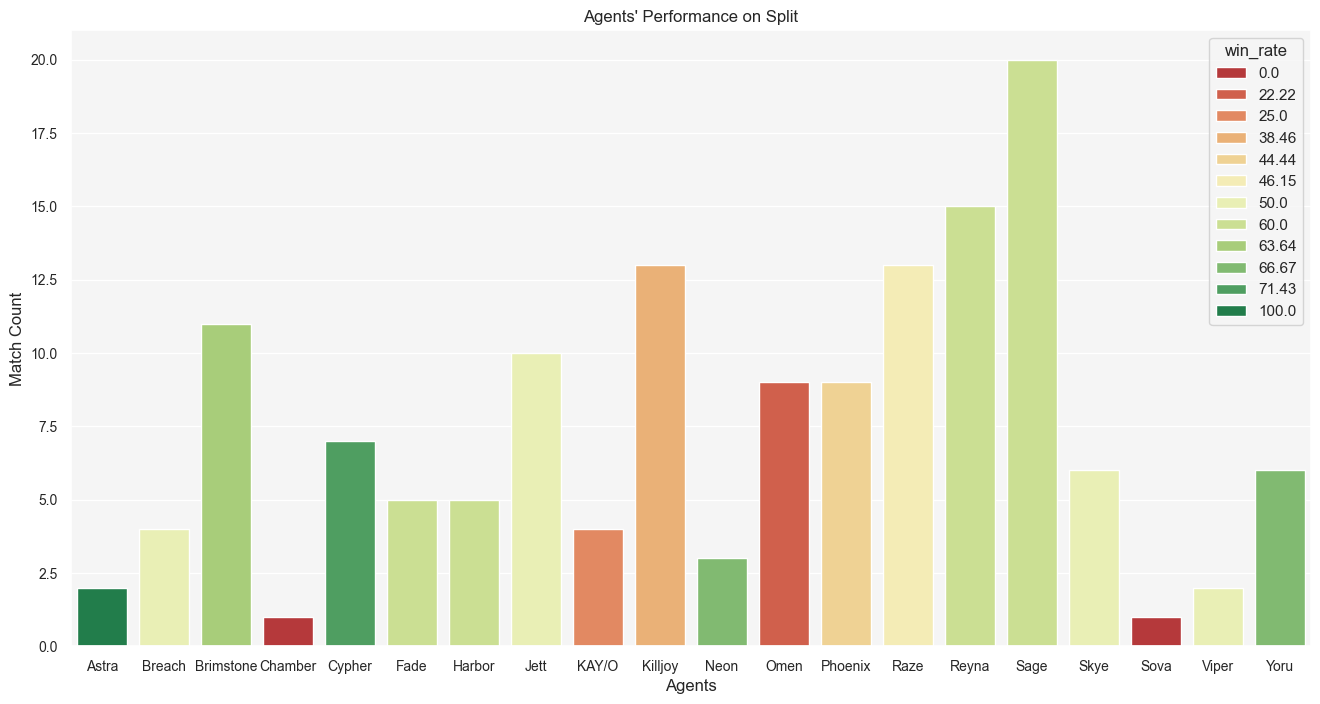

In [7]:
give_agent_map_corr("Split")

##### Ascent

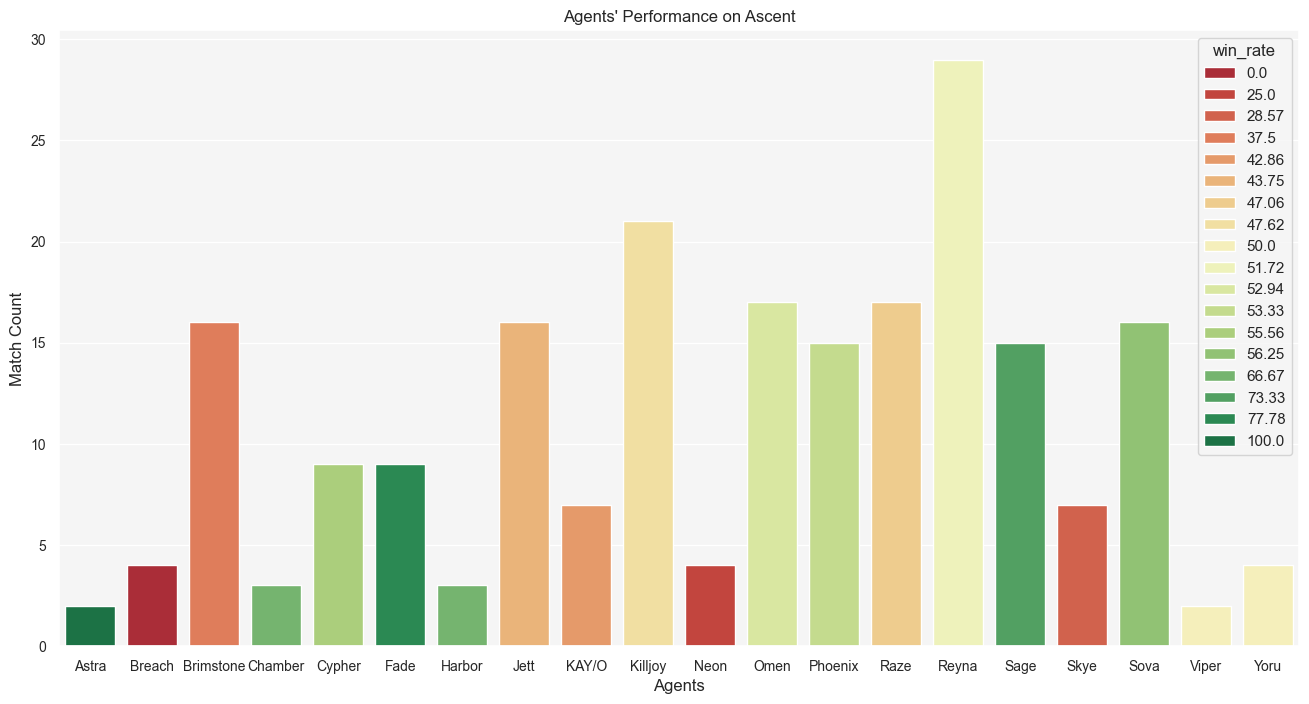

In [8]:
give_agent_map_corr("ascent")

##### Fracture

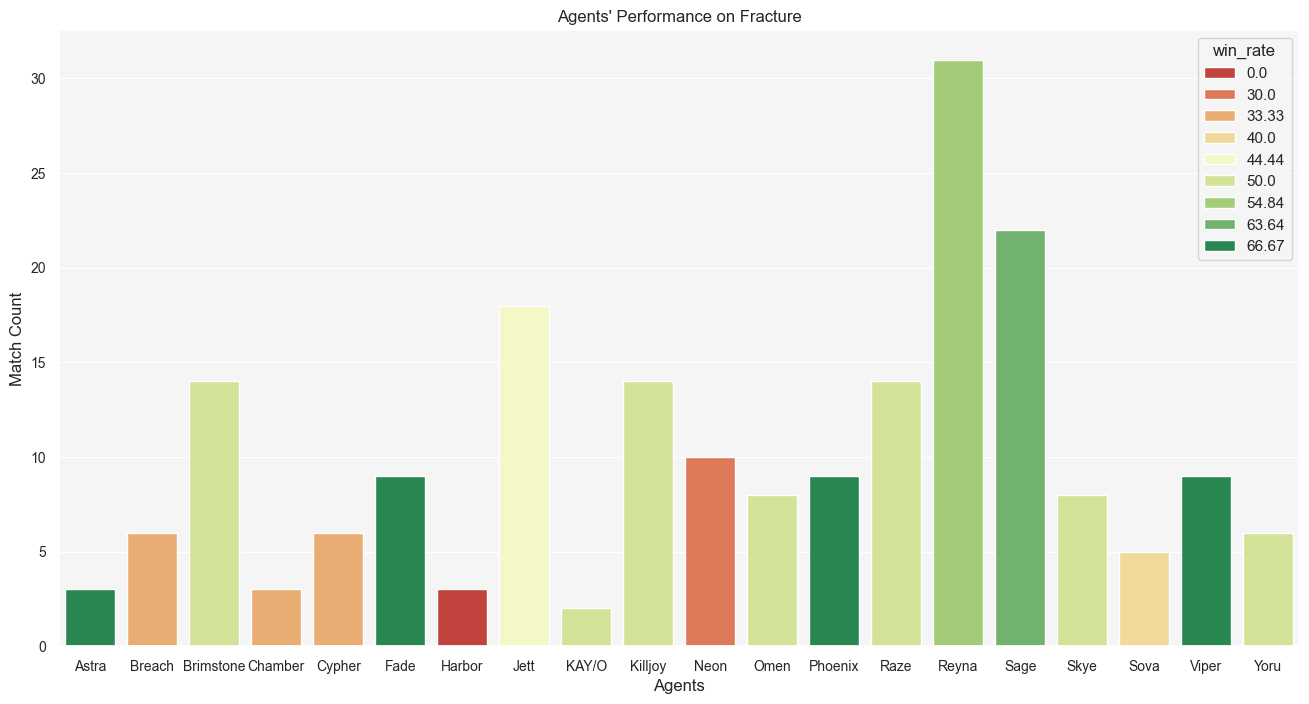

In [9]:
give_agent_map_corr("Fracture")

##### Pearl

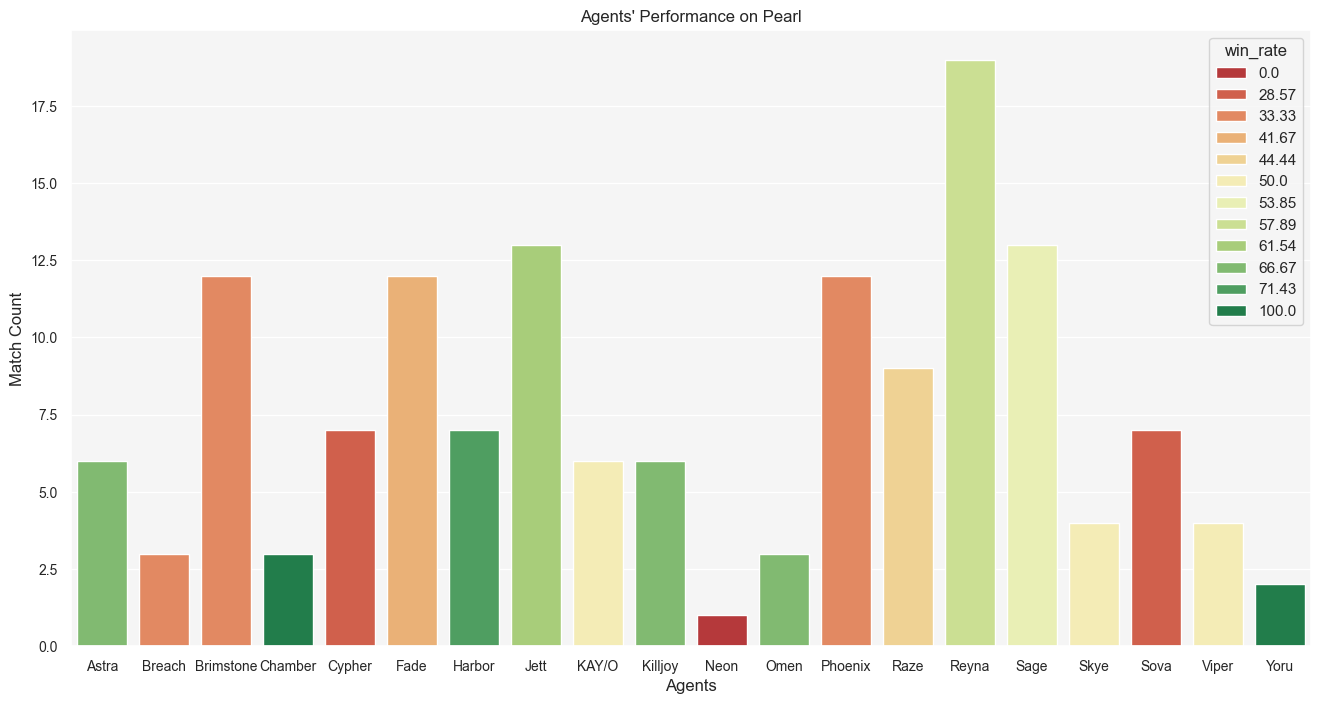

In [10]:
give_agent_map_corr("Pearl")

##### Lotus

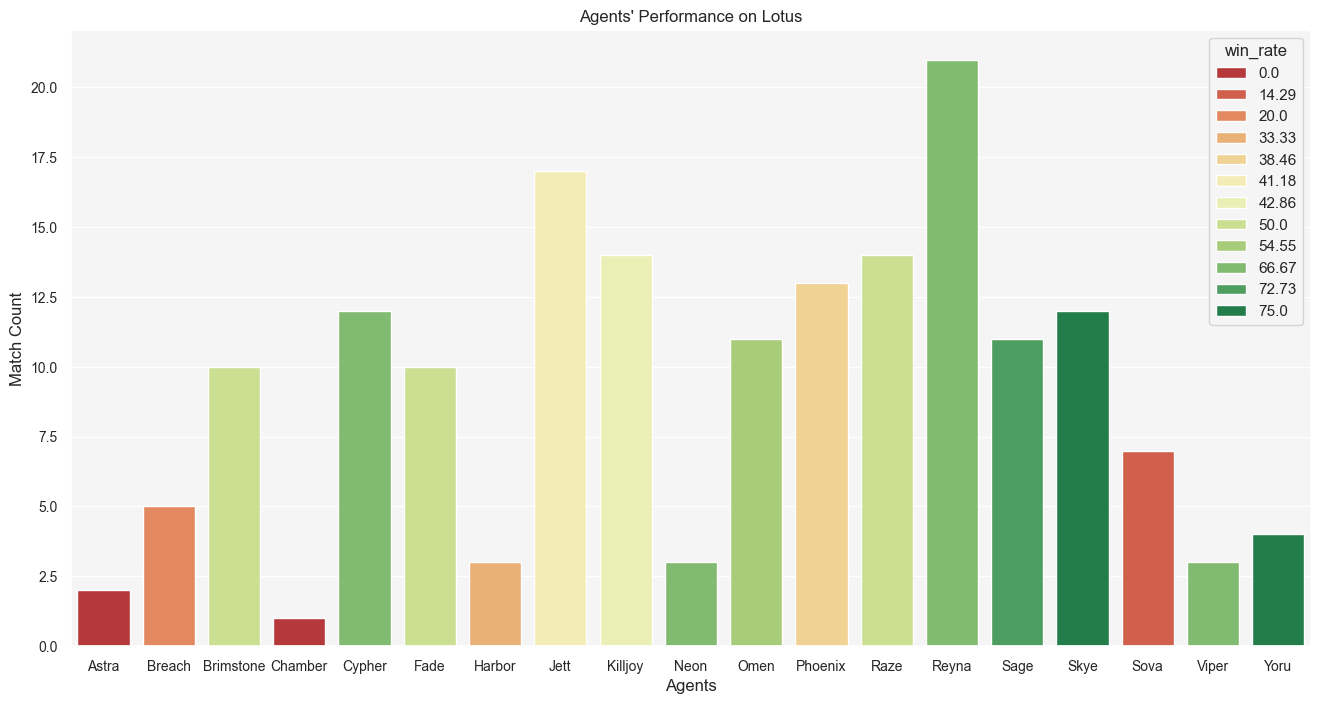

In [11]:
give_agent_map_corr("Lotus")

<hr>  
  
### Player's Performance on Maps

##### Prereq Code

In [12]:
def tier_to_rank(rank):

    if rank == 0:
        return "Uncalibrated"
    elif rank in range(1,4):
        return "Iron"    
    elif rank in range(4,7):
        return "Bronze" 
    elif rank in range(7,10):
        return "Silver" 
    elif rank in range(10,13):
        return "Gold" 
    elif rank in range(13,16):
        return "Plat"   
    elif rank in range(16,19):
        return "Diamond"  
    elif rank in range(19,22):
        return "Ascendant"  
    elif rank in range(22,25):
        return "Immortal"  
    else:
        return "Radiant"  
        

val_data["rank_group"] = val_data["rank"].apply(tier_to_rank)
val_data

,agent,val_map,rank,win,rank_group
0,Reyna,Haven,14,True,Plat
1,Phoenix,Haven,14,True,Plat
2,Fade,Haven,13,True,Plat
3,Killjoy,Haven,12,False,Gold
4,Jett,Haven,15,False,Plat
...,...,...,...,...,...
1375,Harbor,Ascent,11,True,Gold
1376,Sova,Ascent,11,True,Gold
1377,Jett,Ascent,14,False,Plat
1378,Reyna,Ascent,14,True,Plat


#### Rank Performance Based on Maps

In [13]:
rank_data = val_data.groupby(["rank_group","val_map"], as_index = False)["win"].sum()
win_count = rank_data["win"].to_numpy()
match_count = val_data.groupby(["rank_group", "val_map"], as_index = False)["win"].count()["win"].to_numpy()
rank_data["match_count"] = match_count
rank_data["win_rate"] = np.around((win_count / match_count) * 100, decimals = 2)

rank_data["rank_group"] = pd.Categorical(rank_data["rank_group"], categories = ["Bronze", "Silver", "Gold", "Plat", "Diamond", "Ascendant"], ordered = True)

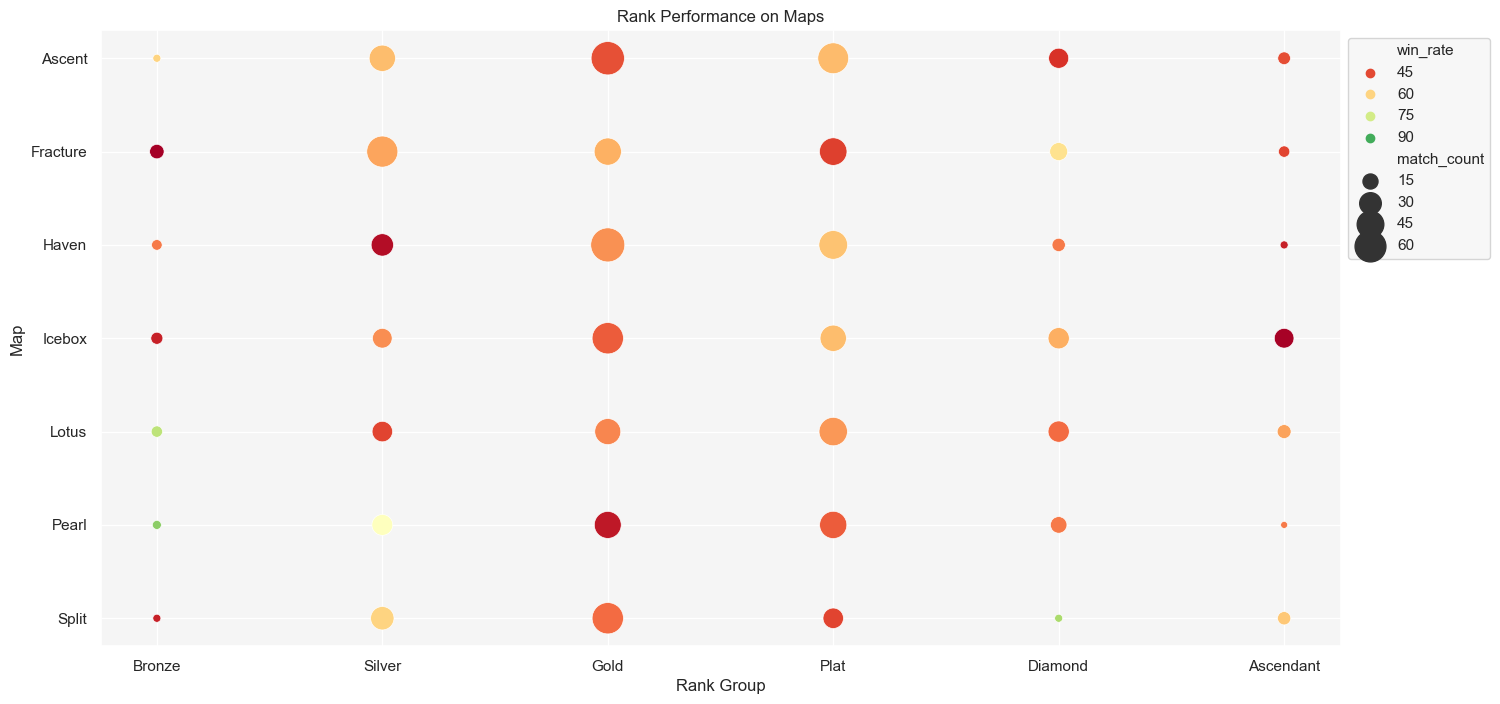

In [14]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

sns.scatterplot(data = rank_data, x = "rank_group", y = "val_map", size = "match_count", sizes = (0, 600), hue = "win_rate", palette = "RdYlGn")

plt.xlabel("Rank Group")
plt.ylabel("Map")
plt.legend(bbox_to_anchor = (1,1))
plt.title("Rank Performance on Maps")

plt.show()

#### Rank Performance based on Agents

In [15]:
rank_data = val_data.groupby(["rank_group","agent"], as_index = False)["win"].sum()
win_count = rank_data["win"].to_numpy()
match_count = val_data.groupby(["rank_group", "agent"], as_index = False)["win"].count()["win"].to_numpy()
rank_data["match_count"] = match_count
rank_data["win_rate"] = np.around((win_count / match_count) * 100, decimals = 2)

rank_data["rank_group"] = pd.Categorical(rank_data["rank_group"], categories = ["Bronze", "Silver", "Gold", "Plat", "Diamond", "Ascendant"], ordered = True)
rank_data["agent"] = pd.Categorical(rank_data["agent"], 
    categories = ["Phoenix", "Reyna", "Yoru", "Raze", "Jett", "Neon", "Sova", "Fade", "Breach", "KAY/O", "Skye", "Astra", "Brim", "Omen", "Harbor", "Viper","Cypher", "Killjoy", "Chamber", "Sage"], 
    ordered = True)

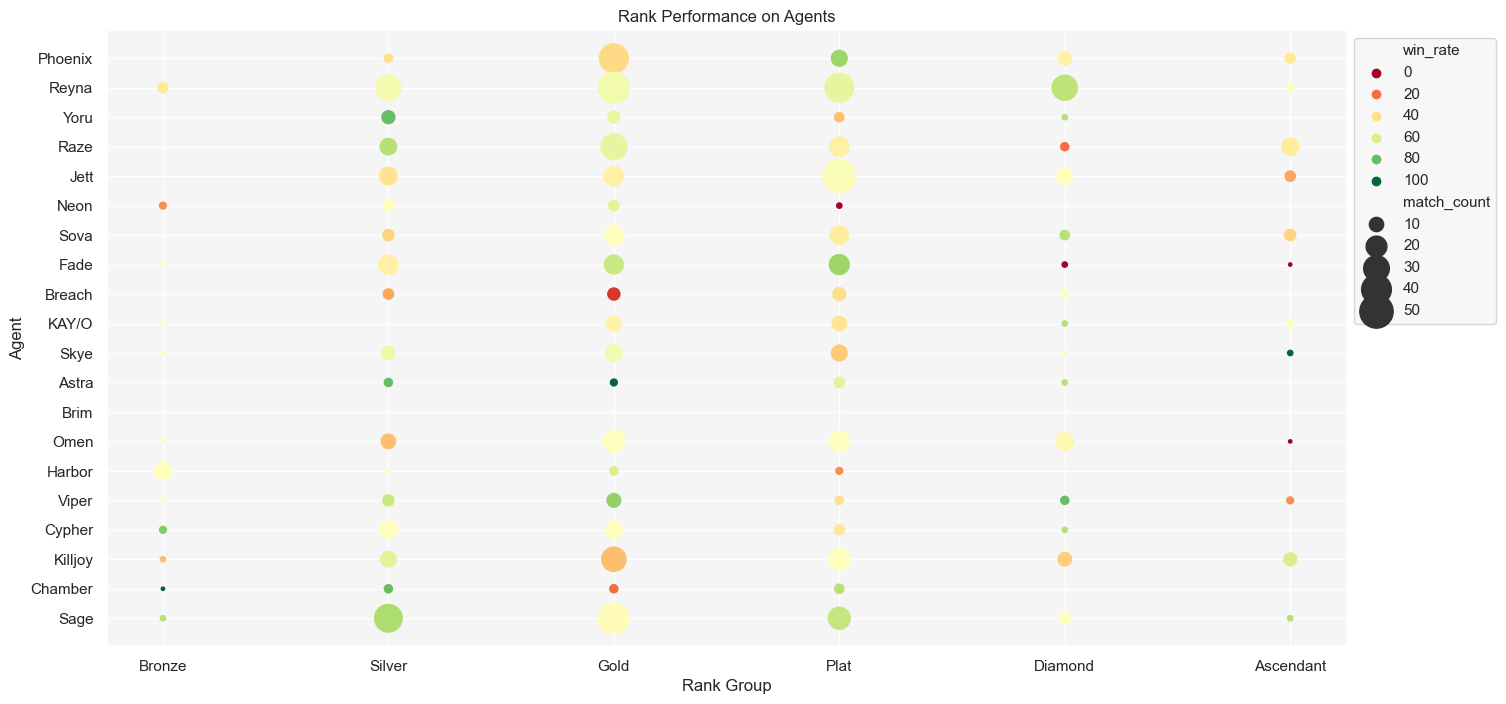

In [16]:
sns.set(rc = {"figure.figsize": (16, 8), 'axes.facecolor':'whitesmoke', 'figure.facecolor':'white'})

sns.scatterplot(data = rank_data, x = "rank_group", y = "agent", size = "match_count", sizes = (0, 600), hue = "win_rate", palette = "RdYlGn")

plt.xlabel("Rank Group")
plt.ylabel("Agent")
plt.legend(bbox_to_anchor = (1,1))
plt.title("Rank Performance on Agents")

plt.show()